# **Paul Golder - Capstone Project March 2025**

## Objectives

* Enhance data for use in Machine Learning Models

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'h:\\VScode\\CapStoneProject_2025-1\\d_transform'

In [2]:
# check current directory contains the file README.md
if os.path.exists("README.md"):
    print("The file README.md exists in the current directory")
else:
    print("The file README.md does not exist in the current directory")
    print("You are in the directory: ", current_dir)
    print("Changing current directory to its parent directory")
    os.chdir(os.path.dirname(current_dir))
    print("You set a new current directory")
    current_dir = os.getcwd()
    if os.path.exists("README.md"):
        print("The file README.md exists in the current directory")
    else:
        RuntimeError("The file README.md does not exist in the current directory, please check the current directory")
        print("Current Directory =", current_dir)

The file README.md does not exist in the current directory
You are in the directory:  h:\VScode\CapStoneProject_2025-1\d_transform
Changing current directory to its parent directory
You set a new current directory
The file README.md exists in the current directory


# Section 1

In [9]:
import pandas as pd
source_df = pd.read_csv("data/dataforML.csv", low_memory=False)
source_df.head()





,Unnamed: 0,subject,label,file,media_type,month,day,year,date_clean,day_of_week,...,title_subjectivity,overall_polarity,overall_subjectivity,contradiction_polarity,contradiction_subjectivity,polarity_variations,subjectivity_variations,sentiment_article,sentiment_title,sentiment_overall
0,0,politicsNews,1,True,instagram,12,31,2017,2017-12-31,Sunday,...,0.0,0.014,0.206,0.028,0.411,0.000,0.000,positive neutral,neutral higly objective,positive objective
1,1,politicsNews,1,True,twitter,12,29,2017,2017-12-29,Friday,...,0.1,-0.003,0.201,0.195,0.203,-1.945,2.026,positive objective,negative higly objective,negative objective
2,2,politicsNews,1,True,twitter,12,31,2017,2017-12-31,Sunday,...,0.0,0.064,0.160,0.127,0.319,0.000,0.000,positive objective,neutral higly objective,positive higly objective
3,3,politicsNews,1,True,facebook,12,30,2017,2017-12-30,Saturday,...,0.0,0.016,0.131,0.031,0.263,0.000,0.000,positive objective,neutral higly objective,positive higly objective
4,4,politicsNews,1,True,video,12,29,2017,2017-12-29,Friday,...,0.2,0.114,0.279,-0.172,0.158,-0.859,0.790,positive objective,positive higly objective,positive objective


Section 1 content

In [13]:
# create a count of records by the column 'file'
count_by_file = source_df['file'].value_counts()
count_by_file.head()

#save all records with the file 'fake', 'True' or 'true' and a random 50% of all other records to a csv file called training_data.csv
training_data = source_df[source_df['file'].str.contains('fake|True|true', na=False) | (source_df['file'].str.contains('fake|True|true', na=False)==False) & (source_df['file'].str.contains('fake|True|true', na=False)==False)].sample(frac=0.5)
training_data.to_csv("data/training_data.csv", index=False)
training_data.head()

# create a dataframe of all records not in training_data and name it testing_data
testing_data = source_df[~source_df.index.isin(training_data.index)]
testing_data.to_csv("data/testing_data.csv", index=False)
testing_data.head()



,Unnamed: 0,subject,label,file,media_type,month,day,year,date_clean,day_of_week,...,title_subjectivity,overall_polarity,overall_subjectivity,contradiction_polarity,contradiction_subjectivity,polarity_variations,subjectivity_variations,sentiment_article,sentiment_title,sentiment_overall
1,1,politicsNews,1,True,twitter,12,29,2017,2017-12-29,Friday,...,0.100,-0.003,0.201,0.195,0.203,-1.945,2.026,positive objective,negative higly objective,negative objective
3,3,politicsNews,1,True,facebook,12,30,2017,2017-12-30,Saturday,...,0.000,0.016,0.131,0.031,0.263,0.000,0.000,positive objective,neutral higly objective,positive higly objective
5,5,politicsNews,1,True,instagram,12,29,2017,2017-12-29,Friday,...,0.000,-0.010,0.185,-0.020,0.370,0.000,0.000,negative objective,neutral higly objective,negative higly objective
7,7,politicsNews,1,True,twitter,12,29,2017,2017-12-29,Friday,...,0.000,0.010,0.282,0.019,0.564,0.000,0.000,positive neutral,neutral higly objective,positive objective
11,11,politicsNews,1,True,twitter,12,28,2017,2017-12-28,Thursday,...,0.455,0.119,0.417,-0.035,-0.075,-0.256,-0.165,positive objective,positive neutral,positive neutral


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy.sparse import issparse
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Get transformed feature names
from itertools import chain

In [7]:
# Load dataset
source_df = pd.read_csv("data/combined_data.csv")

# Define features
numericfeatures = ["title_length", "text_length"]
high_cardinality_features = ["date_clean", "location"]
low_cardinality_features = ["media_type", "source_name", "subject"]
features = numericfeatures + high_cardinality_features + low_cardinality_features
target = "label"
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericfeatures),
        ('ord', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), high_cardinality_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), low_cardinality_features)
    ]
)

# Create pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Fit and transform data
transformed_data = pipeline.fit_transform(source_df)

# Convert sparse matrix to DataFrame if necessary
if issparse(transformed_data):
    transformed_data = transformed_data.toarray()

processed_df = pd.DataFrame(transformed_data)

# Display the shape of the transformed DataFrame
print(processed_df.shape)  # Expect something more reasonable like (5, 50) instead of (5, 41150)
print(processed_df.head())

(44853, 20)
         0         1       2       3    4    5    6    7    8    9    10   11  \
0 -0.627130  1.001669  1003.0  1378.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1 -0.627130  0.733741  1001.0  1378.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
2 -0.785014  0.140800  1003.0  1378.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3 -0.824485 -0.010197  1002.0  1378.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
4 -0.429775  1.248881  1001.0  1116.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   

    12   13   14   15   16   17   18   19  
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  


In [8]:
# Numeric features remain the same
numeric_feature_names = numericfeatures  

# Ordinal encoded features remain but are numerical
ordinal_feature_names = high_cardinality_features  

# Get the names for OneHotEncoded features
onehot_feature_names = list(pipeline.named_steps['preprocessor']
                            .named_transformers_['cat']
                            .get_feature_names_out(low_cardinality_features))

# Combine them all
all_feature_names = numeric_feature_names + ordinal_feature_names + list(onehot_feature_names)

# Assign them to the transformed DataFrame
processed_df.columns = all_feature_names

# Print the first few rows
print(processed_df.head())

   title_length  text_length  date_clean  location  media_type_image  \
0     -0.627130     1.001669      1003.0    1378.0               0.0   
1     -0.627130     0.733741      1001.0    1378.0               0.0   
2     -0.785014     0.140800      1003.0    1378.0               0.0   
3     -0.824485    -0.010197      1002.0    1378.0               0.0   
4     -0.429775     1.248881      1001.0    1116.0               0.0   

   media_type_poll  media_type_text  media_type_twitter  media_type_video  \
0              0.0              0.0                 1.0               0.0   
1              0.0              0.0                 1.0               0.0   
2              0.0              1.0                 0.0               0.0   
3              0.0              1.0                 0.0               0.0   
4              0.0              0.0                 1.0               0.0   

   source_name_IFR  source_name_Reuters  source_name_Unknown  \
0              0.0                  1.0 

In [9]:
# Merge back the target column
processed_df["label"] = source_df["label"]  # Ensure correct alignment!

# Check correlation
print(processed_df.corr()["label"].sort_values(ascending=False))

label                      1.000000
source_name_Reuters        0.919621
subject_politicsNews       0.606061
media_type_text            0.566222
subject_worldnews          0.565553
date_clean                 0.473211
media_type_poll            0.135191
media_type_twitter         0.028589
source_name_IFR            0.008555
text_length               -0.042996
subject_Middle-east       -0.127008
subject_US_News           -0.127423
subject_Government News   -0.181946
media_type_image          -0.286929
subject_left-news         -0.317494
subject_politics          -0.404143
location                  -0.479808
subject_News              -0.480620
media_type_video          -0.484572
title_length              -0.574435
source_name_Unknown       -0.919746
Name: label, dtype: float64


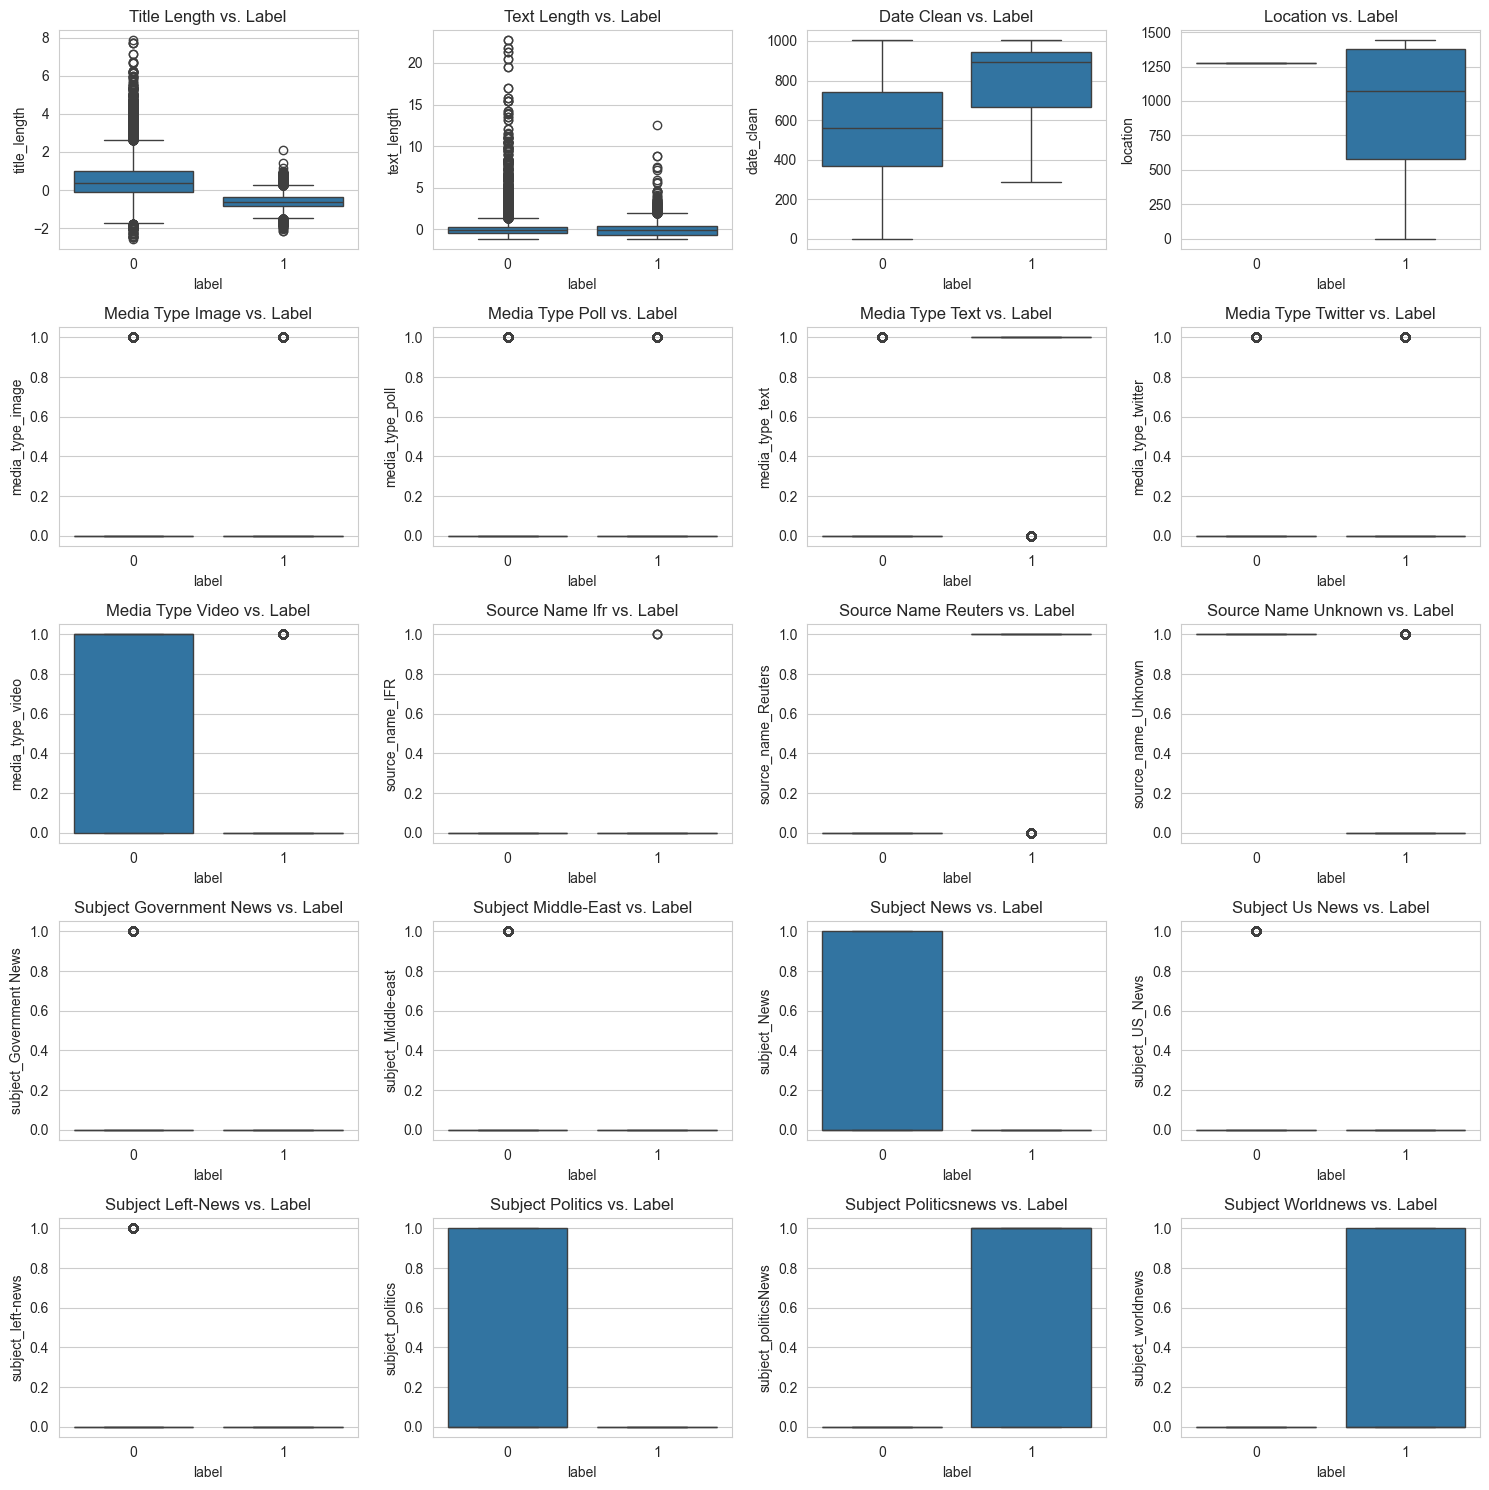

In [10]:
# Define the features to plot
all_feature_names = [col for col in processed_df.columns if col != target]
features_to_plot = all_feature_names

# Calculate the number of rows needed
num_features = len(features_to_plot)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=processed_df["label"], y=processed_df[feature], ax=axes[i])
    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs. Label")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
# Train a simple model
X = processed_df.drop(columns=["label"])
y = processed_df["label"]
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

source_name_Reuters        2.394674e-01
source_name_Unknown        2.362086e-01
subject_politicsNews       1.758033e-01
location                   1.179918e-01
subject_worldnews          6.995210e-02
title_length               6.234236e-02
date_clean                 2.336586e-02
subject_News               1.919401e-02
media_type_text            1.503179e-02
media_type_video           1.265220e-02
subject_politics           1.128305e-02
subject_left-news          4.262554e-03
media_type_image           3.108181e-03
subject_US_News            2.615499e-03
subject_Government News    2.014553e-03
subject_Middle-east        2.004923e-03
text_length                1.750120e-03
media_type_poll            6.016191e-04
media_type_twitter         3.498218e-04
source_name_IFR            2.375112e-07
dtype: float64


In [12]:
# remove low-variance features
# Remove features with very low variance (e.g., all values are almost the same)
var_thresh = VarianceThreshold(threshold=0.01)  # Remove near-constant features
X_reduced = var_thresh.fit_transform(X)

# Get the remaining feature names
selected_features = X.columns[var_thresh.get_support()]
print("Remaining Features:", list(selected_features))

Remaining Features: ['title_length', 'text_length', 'date_clean', 'location', 'media_type_image', 'media_type_poll', 'media_type_text', 'media_type_twitter', 'media_type_video', 'source_name_Reuters', 'source_name_Unknown', 'subject_Government News', 'subject_Middle-east', 'subject_News', 'subject_US_News', 'subject_left-news', 'subject_politics', 'subject_politicsNews', 'subject_worldnews']


In [13]:
# Compute correlation matrix
corr_matrix = X[selected_features].corr().abs()

# Find features with correlation above 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X_reduced = X[selected_features].drop(columns=to_drop)

print("Features after correlation filtering:", list(X_reduced.columns))

Features after correlation filtering: ['title_length', 'text_length', 'date_clean', 'location', 'media_type_image', 'media_type_poll', 'media_type_text', 'media_type_twitter', 'media_type_video', 'source_name_Reuters', 'subject_Government News', 'subject_Middle-east', 'subject_News', 'subject_US_News', 'subject_left-news', 'subject_politics', 'subject_politicsNews', 'subject_worldnews']


In [14]:
# implement Recursive Feature Elimination (RFE) - to train the model and remove least important features
# Use RandomForest to evaluate feature importance
rfe_selector = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X_reduced, y)

# Get selected feature names
selected_features = X_reduced.columns[rfe_selector.support_]
print("Final Selected Features:", list(selected_features))

Final Selected Features: ['title_length', 'date_clean', 'location', 'media_type_text', 'media_type_video', 'source_name_Reuters', 'subject_News', 'subject_politics', 'subject_politicsNews', 'subject_worldnews']


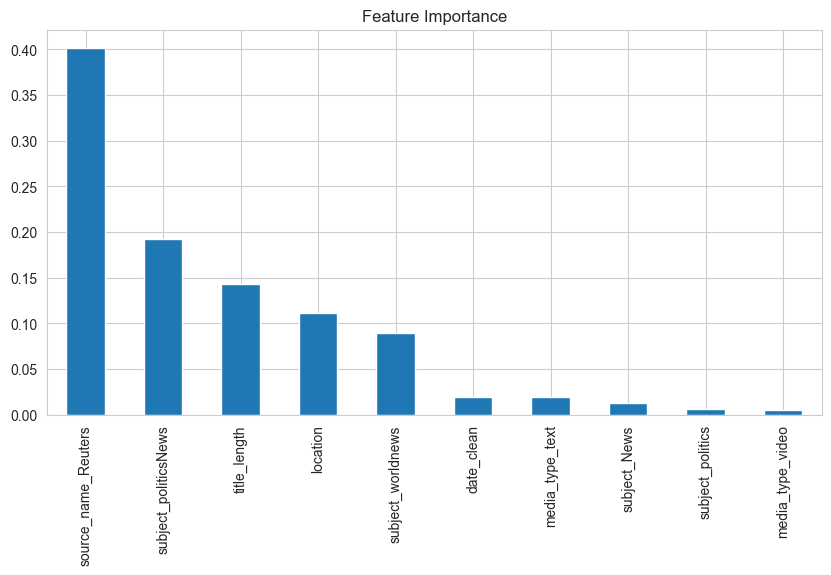

In [15]:
# Train a final model with selected features
model = RandomForestClassifier()
model.fit(X_reduced[selected_features], y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)
importances.plot(kind="bar", figsize=(10, 5), title="Feature Importance")
plt.show()


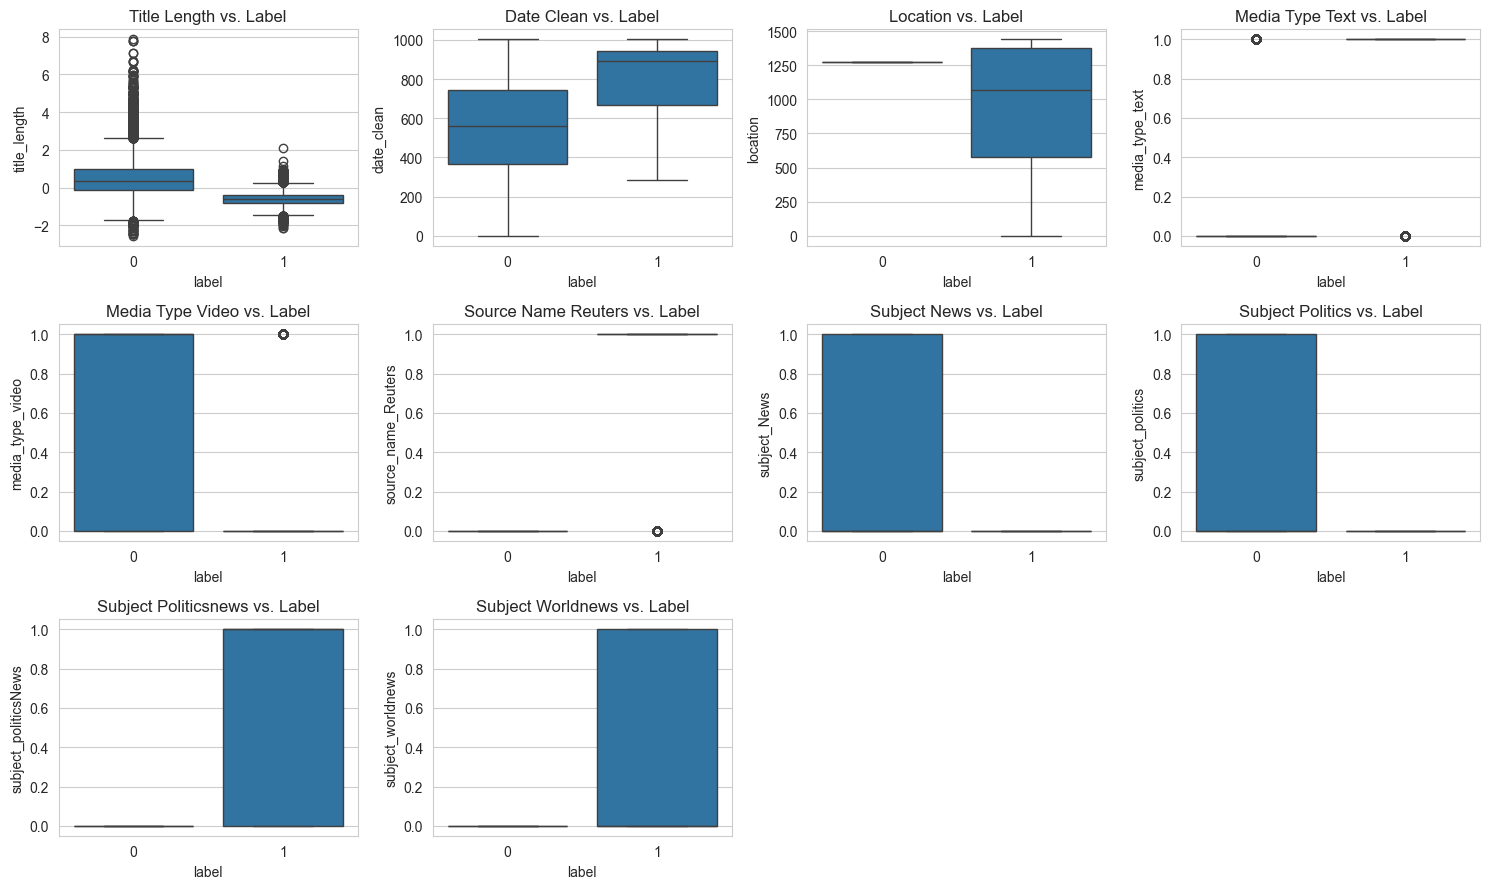

In [16]:
# Define the features to plot
features_to_plot = selected_features

# Calculate the number of rows needed
num_features = len(features_to_plot)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=processed_df["label"], y=processed_df[feature], ax=axes[i])
    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs. Label")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
print(processed_df.head())
print(selected_features)

   title_length  text_length  date_clean  location  media_type_image  \
0     -0.627130     1.001669      1003.0    1378.0               0.0   
1     -0.627130     0.733741      1001.0    1378.0               0.0   
2     -0.785014     0.140800      1003.0    1378.0               0.0   
3     -0.824485    -0.010197      1002.0    1378.0               0.0   
4     -0.429775     1.248881      1001.0    1116.0               0.0   

   media_type_poll  media_type_text  media_type_twitter  media_type_video  \
0              0.0              0.0                 1.0               0.0   
1              0.0              0.0                 1.0               0.0   
2              0.0              1.0                 0.0               0.0   
3              0.0              1.0                 0.0               0.0   
4              0.0              0.0                 1.0               0.0   

   source_name_IFR  ...  source_name_Unknown  subject_Government News  \
0              0.0  ...        

In [18]:
pipeline2 = Pipeline([
      ("feature_scaling", StandardScaler()) 
  ])
# use pipeline to encode the categorical features
X2 = processed_df[selected_features]
y2 = processed_df[target]
X2 = pd.DataFrame(X2, columns=selected_features)
X2.head()


,title_length,date_clean,location,media_type_text,media_type_video,source_name_Reuters,subject_News,subject_politics,subject_politicsNews,subject_worldnews
0,-0.627130,1003.0,1378.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.627130,1001.0,1378.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.785014,1003.0,1378.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.824485,1002.0,1378.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.429775,1001.0,1116.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(processed_df[selected_features], processed_df[target], test_size=0.2, random_state=42)
print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

(35882, 10) (35882,) (8971, 10) (8971,)


In [20]:
pipeline2.fit(X_train2)
X_train_scaled = pipeline2.transform(X_train2)
X_test_scaled = pipeline2.transform(X_test2)

In [21]:
type(X_train_scaled)
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train2.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_train2.columns)

---

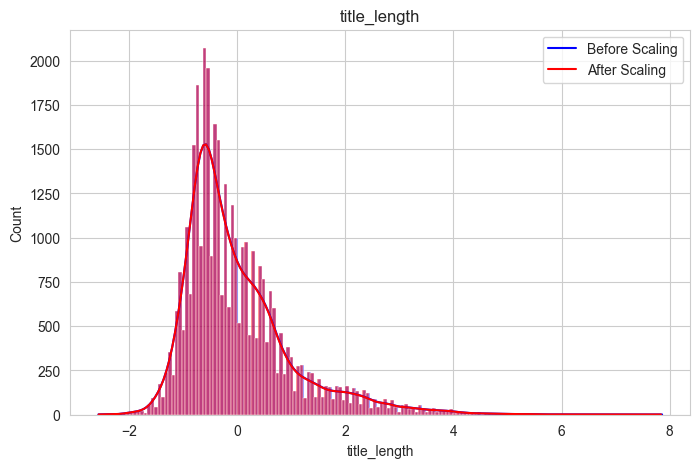

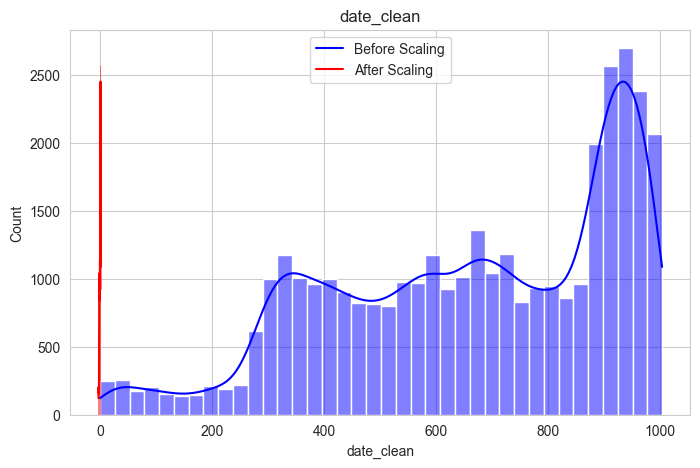

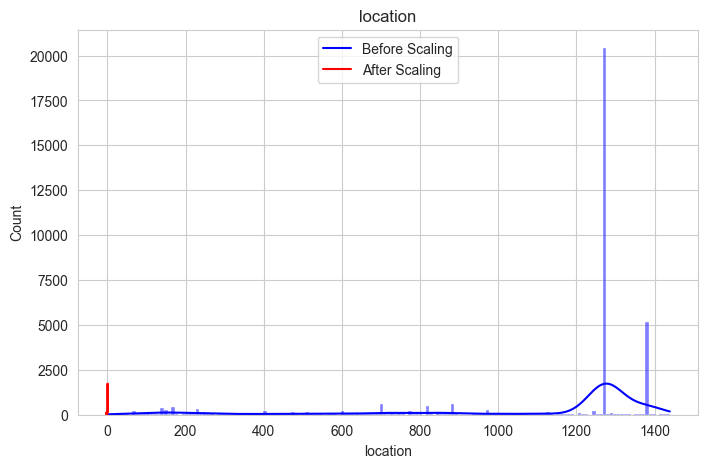

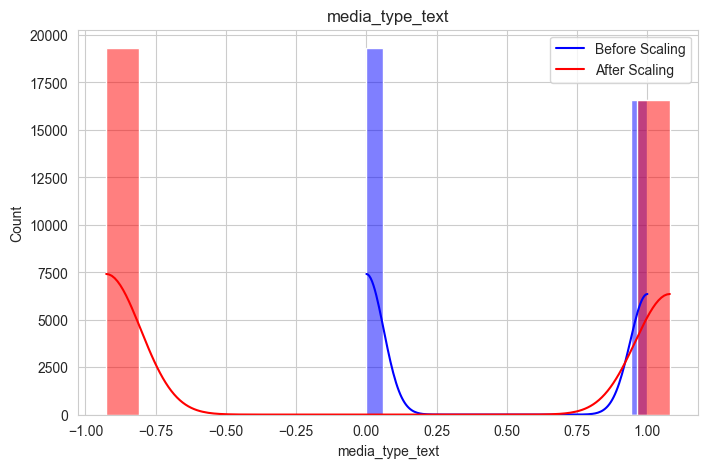

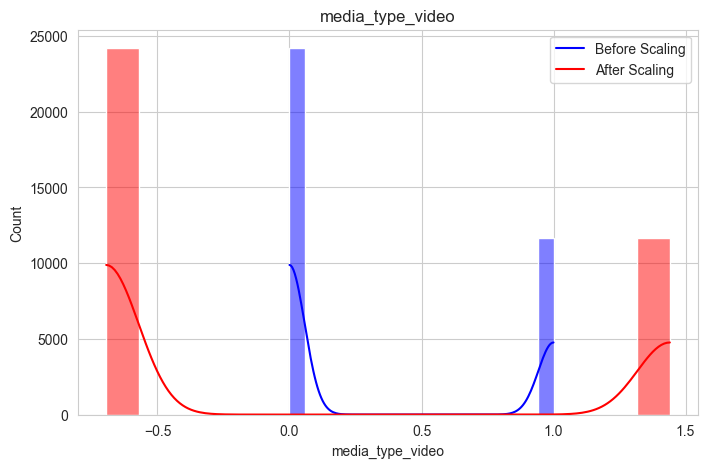

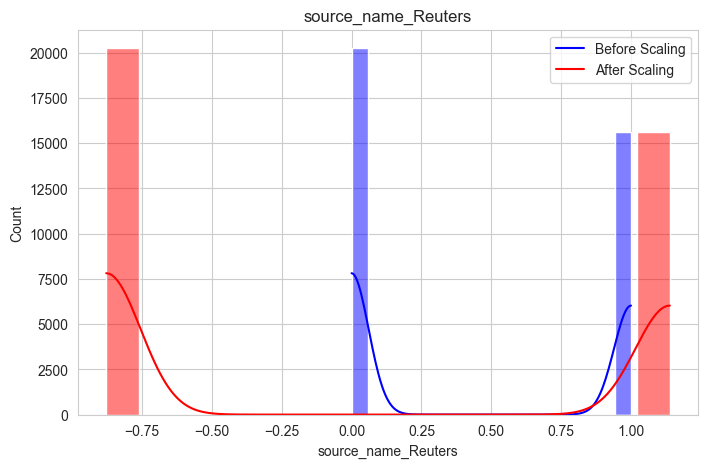

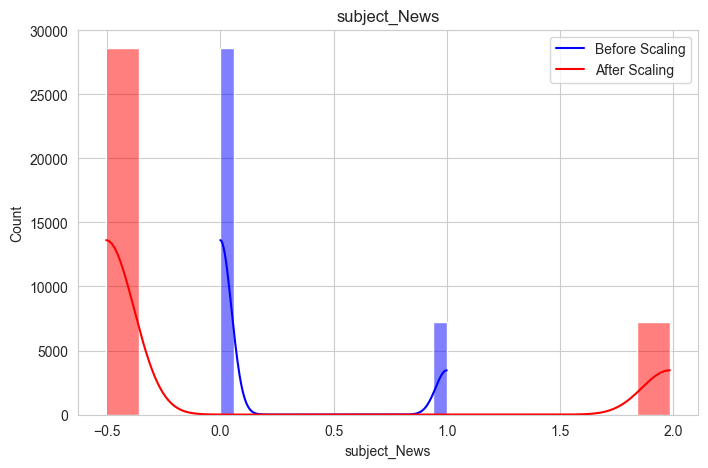

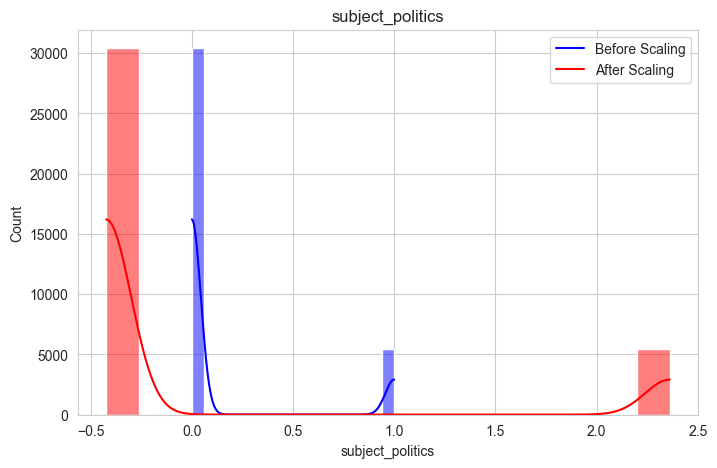

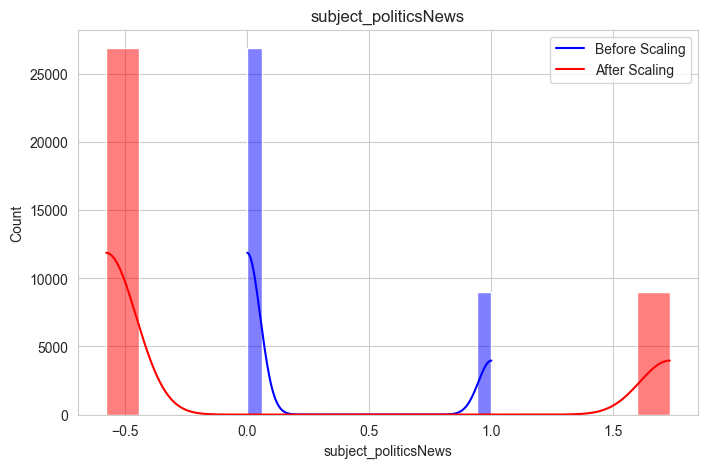

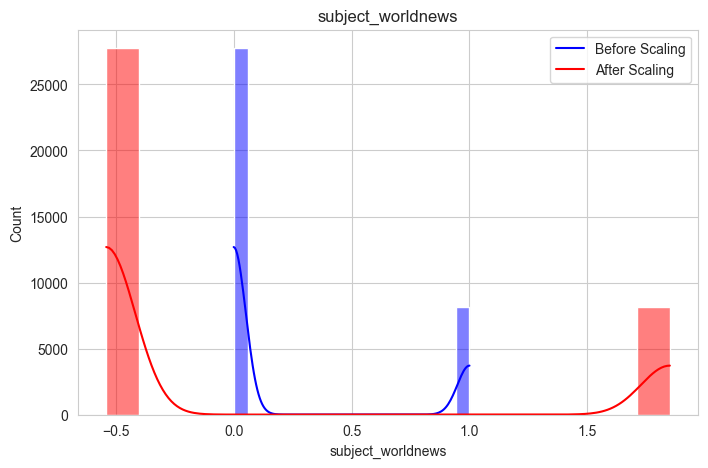

In [22]:
sns.set_style('whitegrid')
for col in X_train2.columns:
  fig, axes = plt.subplots(figsize=(8,5))
  sns.histplot(data=X_train2, x=col, kde=True, color='b',  ax=axes)
  sns.histplot(data=X_train_scaled, x=col, kde=True,color='r', ax=axes)
  axes.set_title(f"{col}")
  axes.legend(labels=['Before Scaling', 'After Scaling'])
  plt.show()
  print("\n\n")